# Regression and Classification Analysis

## Project Overview

This project aims to build several regression and classification models and explore how model complexity impacts generalization performance. The analysis includes polynomial regression, k-Nearest Neighbors (kNN) regression, Lasso regression, and Support Vector Classification (SVC) applied on both synthetic data and the Breast Cancer Wisconsin dataset. 

## Project Description

In this project, we will:
1. **Generate synthetic data** with polynomial relationships.
2. **Evaluate polynomial regression models** of various degrees on this data.
3. **Compare kNN regression** performance.
4. **Apply Lasso regression** to avoid overfitting in high-degree polynomial models.
5. **Analyze the Breast Cancer Wisconsin dataset using SVC** (Support Vector Classification) and investigate the impact of the gamma parameter on model performance.

### Raw Data with Noise Generation

Generating synthetic polynomial data with noise.

In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

warnings.filterwarnings('ignore')

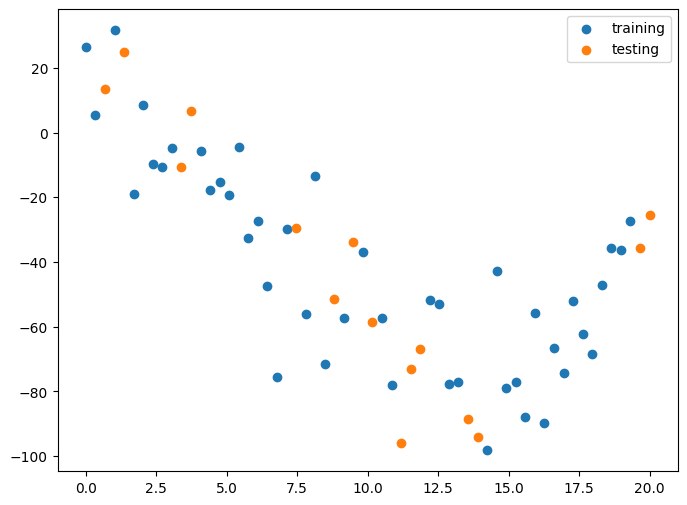

In [2]:
# Constants
C = 15
n = 60
np.random.seed(0)

# Generate data
x = np.linspace(0, 20, n)  # x is drawn from a fixed range
y = x ** 3 / 20 - x ** 2 - x + C * np.random.randn(n)

# convert x and y from horizontal vector array to a 1-column vertical array for use as input to sklearn regression
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create the training and testing sets and their targets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Function to visualize datasets
def data_scatter():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label="training")
    plt.scatter(X_test, y_test, label="testing")
    plt.legend(loc="best")
    plt.show()

# Visualize the data
data_scatter()

### Polynomial Features and Quality of Fit
#### Task 1a - Polynomial Features
Fit polynomial expansions of the training data for degrees 1, 3, 7, 11 to a Linear Regression model.

In [3]:
DEGS = (1, 3, 7, 11)  # Fixed degrees for polynomial features

def polynomial_feature_regression_a():
    preds = []
    
    for degree in DEGS:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(np.linspace(0, 20, 100).reshape(-1, 1))

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)
        preds.append(y_pred.flatten())
    
    return np.array(preds)

predictions = polynomial_feature_regression_a()

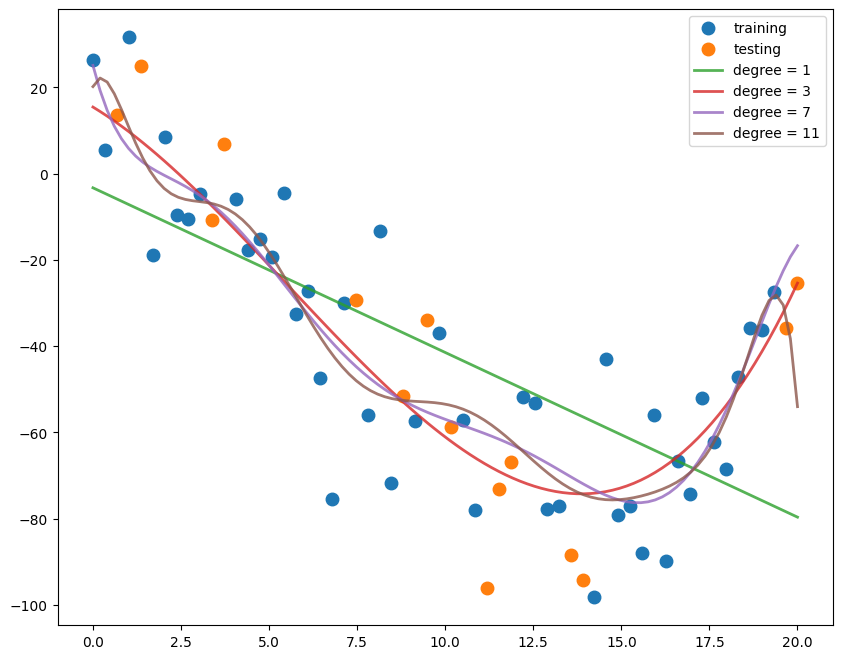

In [4]:
# Plot polynomial curves
def plot_one(predictions):
    x_values = np.linspace(0, 20, 100)
    plt.figure(figsize=(10, 8))
    plt.plot(X_train, y_train, "o", label="training", markersize=9)
    plt.plot(X_test, y_test, "o", label="testing", markersize=9)
    for i, deg in enumerate(DEGS):
        plt.plot(x_values, predictions[i], alpha=0.8, lw=2, label=f"degree = {deg}")
    plt.legend(loc="best")
    plt.show()

# Plot the polynomial curves
plot_one(predictions)

#### Task 1b - Polynomial Features and Quality of Fit
Calculate the R² scores for polynomials of degrees 1, 3, 7, 11 on both training and testing datasets.

In [5]:
def polynomial_feature_regression_b():
    r2_train, r2_test = [], []
    
    for degree in DEGS:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        r2_train.append(r2_score(y_train, y_train_pred))
        r2_test.append(r2_score(y_test, y_test_pred))
    
    return r2_train, r2_test

r2_train, r2_test = polynomial_feature_regression_b()
print("R² on training data:", r2_train)
print("R² on testing data:", r2_test)

R² on training data: [0.5146908335931619, 0.7716782246401617, 0.7905134245393401, 0.7966161233895743]
R² on testing data: [0.3660750337906714, 0.8666116934853956, 0.8114944976828509, 0.7860219139675924]


#### Task 2a - KNN Regression
Fit a KNN regression model with the training data and return the R² value on the testing data.

In [6]:
def knn_regression():
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train, y_train)
    y_test_pred = knn_model.predict(X_test)
    return r2_score(y_test, y_test_pred)

knn_r2 = knn_regression()
print("KNN R² on testing data:", knn_r2)

KNN R² on testing data: 0.7770358819030301


#### Task 3a - Polynomial Fitting with Lasso Regression
Fit polynomial models of varying degrees (1, 3, 7, 11) with Lasso Regression to avoid overfitting.

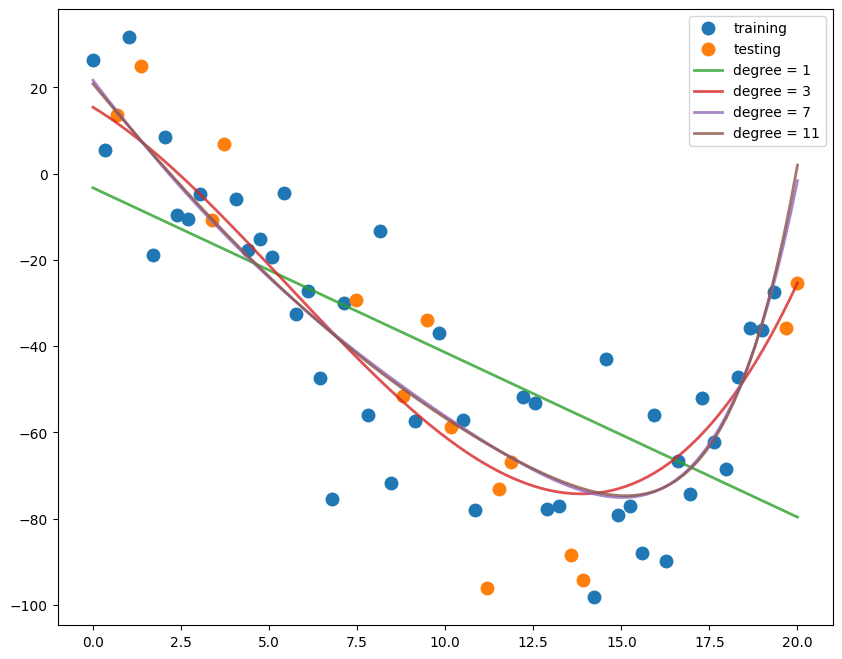

In [7]:
def polynomial_lasso_regression_a():
    preds = []
    
    for degree in DEGS:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(np.linspace(0, 20, 100).reshape(-1, 1))

        lasso_model = Lasso(alpha=0.01, max_iter=10000)
        lasso_model.fit(X_train_poly, y_train)

        y_pred = lasso_model.predict(X_test_poly)
        preds.append(y_pred.flatten())
    
    return np.array(preds)

lasso_predictions = polynomial_lasso_regression_a()

# Plot Lasso polynomial curves
plot_one(lasso_predictions)

## Breast Cancer Wisconsin dataset preparation
Prepare the dataset for analysis.

In [8]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data = np.hstack([cancer["data"], cancer["target"].reshape(-1, 1)])
col_names = np.hstack([cancer["feature_names"], ["target"]])
cancer_df = pd.DataFrame(data, columns=col_names)

X_cancer, y_cancer = cancer_df.iloc[:, :-1], cancer_df.iloc[:, -1]
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Task 4 - Applying a SVC to the Wisconsin dataset
Explore the effect of gamma on SVC performance using validation curves.

In [9]:
def svc_classifier():
    svc_model = SVC(kernel='rbf', C=1, random_state=0)
    gamma_values = np.logspace(-7, -2, 6, endpoint=True)
    
    train_scores, test_scores = validation_curve(
        svc_model, X_cancer, y_cancer, param_name="gamma", param_range=gamma_values,
        cv=3, scoring="accuracy", n_jobs=-1
    )
    
    mean_train_scores = np.mean(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)
    
    return mean_train_scores, mean_test_scores

svc_train_scores, svc_test_scores = svc_classifier()
print("SVC training scores:", svc_train_scores)
print("SVC testing scores:", svc_test_scores)

SVC training scores: [0.89631301 0.91653011 0.92882007 0.95166644 0.9780262  1.        ]
SVC testing scores: [0.89462545 0.91218788 0.91918686 0.93146756 0.92089483 0.62565673]


### Gamma vs Accuracy plot
Visualize the relationship between gamma and accuracy.

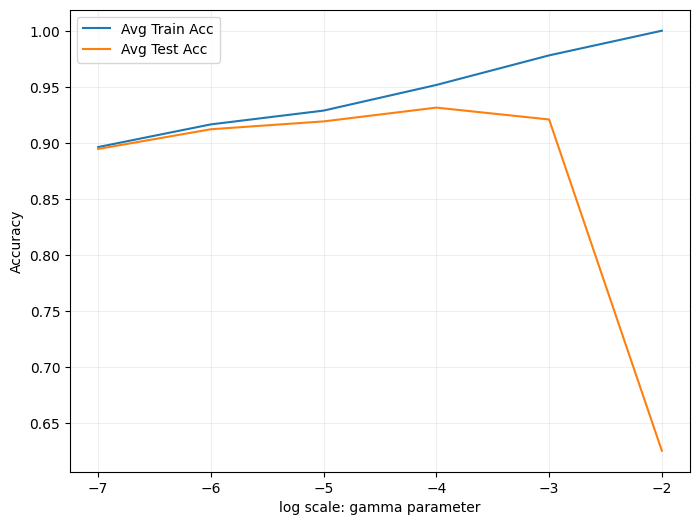

In [10]:
def plot_train_test_acc():
    a, b = svc_classifier()
    x = np.arange(-7, -1, 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, a, label="Avg Train Acc")
    plt.plot(x, b, label="Avg Test Acc")
    plt.xticks(x)
    plt.xlabel("log scale: gamma parameter")
    plt.ylabel("Accuracy")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

# Plot accuracy vs gamma
plot_train_test_acc()